In [131]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [132]:
df=pd.read_csv("C:/Users/jangd/OneDrive/사진/문서/GitHub/git_hub_0420/python/project/dataset/이상치제거한월별외국인순매수와종가합.csv")
df

,Unnamed: 0,날짜,종가,전월대비 등락률,년도,월,date,외국인순매수
0,0,2005-01-31,932.700012,0.041053,2005,1,2005 01,8538
1,1,2005-02-28,1011.359985,0.084336,2005,2,2005 02,14654
2,2,2005-03-31,965.679993,-0.045167,2005,3,2005 03,-20741
3,3,2005-04-29,911.299988,-0.056313,2005,4,2005 04,-3243
4,4,2005-05-31,970.210022,0.064644,2005,5,2005 05,1048
...,...,...,...,...,...,...,...,...
203,203,2021-12-30,2977.649902,0.048834,2021,12,2021 12,15250
204,204,2022-01-28,2663.340088,-0.105556,2022,1,2022 01,-389
205,205,2022-02-28,2699.179932,0.013457,2022,2,2022 02,-6207
206,206,2022-03-31,2757.649902,0.021662,2022,3,2022 03,-23373


In [133]:
from scalecast.Forecaster import Forecaster
import matplotlib.pyplot as plt
import pandas_datareader as pdr

C:\Users\jangd\AppData\Local\Programs\Python\Python310\lib\site-packages\scalecast\Forecaster.py:259: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.future_dates = pd.Series([])


<AxesSubplot:xlabel='Date', ylabel='Values'>

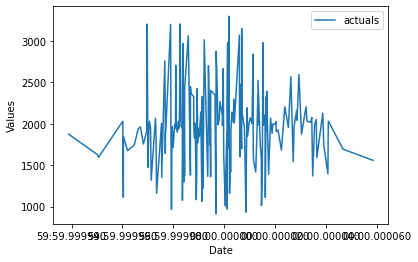

In [134]:
f=Forecaster(y=df['종가'],current_dates=df['외국인순매수'])
f.plot()

C:\Users\jangd\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


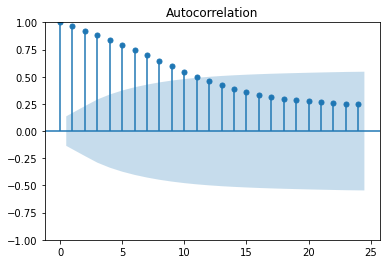

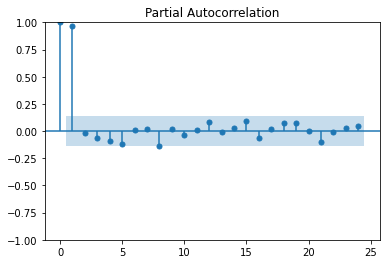

In [135]:
f.plot_acf()
f.plot_pacf()
plt.show()

In [136]:
def acf(series, k):
    mean = series.mean()
    denominator = np.sum(np.square(series-mean))
    numerator = np.sum((series-mean)*(series.shift(k)-mean))
    acf_val = numerator/denominator
    return acf_val
 
def pacf(series, k):
    if k == 0:
        pacf_val = 1
    else:
        gamma_array = np.array([acf(series, k) for k in range(1,k+1)])
 
        gamma_matrix = []
        for i in range(k):
            temp = [0]*k
            temp[i:] = [acf(series, j) for j in range(k-i)]
            gamma_matrix.append(temp)
 
        gamma_matrix = np.array(gamma_matrix)
        gamma_matrix = gamma_matrix + gamma_matrix.T - np.diag(gamma_matrix.diagonal())
        pacf_val = np.linalg.inv(gamma_matrix).dot(gamma_array)[-1]
    return pacf_val


In [137]:
[acf(df['종가'],k) for k in range(10)]

[1.0,
 0.9621981456696695,
 0.9246698273331233,
 0.8846976597040701,
 0.8403096189143242,
 0.7900988427406377,
 0.7423800759209613,
 0.696910961943829,
 0.6442231130550271,
 0.5948449002565881]

In [138]:
[pacf(df['종가'],k) for k in range(10)]

[1,
 0.9621981456696695,
 -0.015577329649369085,
 -0.0524409438371737,
 -0.08119042439373914,
 -0.10319709168419382,
 0.007623135525717362,
 0.012017918082232848,
 -0.11831604732674528,
 0.011346352486926134]

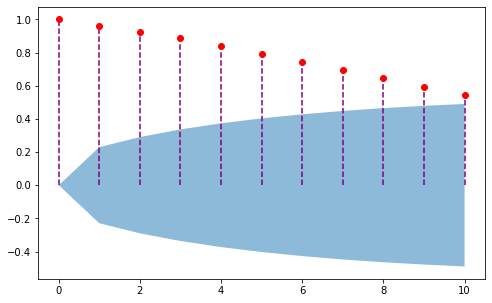

In [139]:
nlags = 10
acfs = [acf(df['종가'],k) for k in range(nlags+1)]
x = range(nlags+1)
fig = plt.figure(figsize=(8,5))
fig.set_facecolor('white')
 
## correlogram
markers, stemlines, baseline = plt.stem(x, acfs, use_line_collection=True)
markers.set_color('red')
stemlines.set_linestyle('--')
stemlines.set_color('purple')
baseline.set_visible(False) ## base line 안보이게
 
n = len(df)
upper_limit = []
lower_limit = []
for k in x:
    if k == 0:
        upper_limit.append(0)
        lower_limit.append(0)
    else:
        term1 = np.sqrt((1+2*np.sum(np.square(acfs[1:k+1])))/n)
        upper_limit.append(1.96*term1)
        lower_limit.append(-1.96*term1)
 
plt.fill_between(x, lower_limit, upper_limit, alpha=0.5)
plt.show()

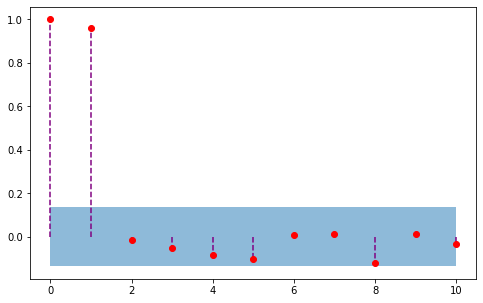

In [140]:
nlags = 10
pacfs = [pacf(df['종가'],k) for k in range(nlags+1)]
x = range(nlags+1)
fig = plt.figure(figsize=(8,5))
fig.set_facecolor('white')
 
## correlogram
markers, stemlines, baseline = plt.stem(x, pacfs, use_line_collection=True)
markers.set_color('red')
stemlines.set_linestyle('--')
stemlines.set_color('purple')
baseline.set_visible(False) ## base line 안보이게
 
n = len(df)
upper_limit = 1.96/np.sqrt(n)
lower_limit = -1.96/np.sqrt(n)
plt.fill_between(x, lower_limit, upper_limit, alpha=0.5)
plt.show()

In [141]:
import statsmodels.api as sm
sm.tsa.stattools.acf(df['종가'], nlags=10, fft=False)

array([1.        , 0.96219815, 0.92466983, 0.88469766, 0.84030962,
       0.79009884, 0.74238008, 0.69691096, 0.64422311, 0.5948449 ,
       0.54570997])

In [142]:
sm.tsa.stattools.pacf(df['종가'], nlags=10, method='ywm')

array([ 1.        ,  0.96219815, -0.01557733, -0.05244094, -0.08119042,
       -0.10319709,  0.00762314,  0.01201792, -0.11831605,  0.01134635,
       -0.03043838])

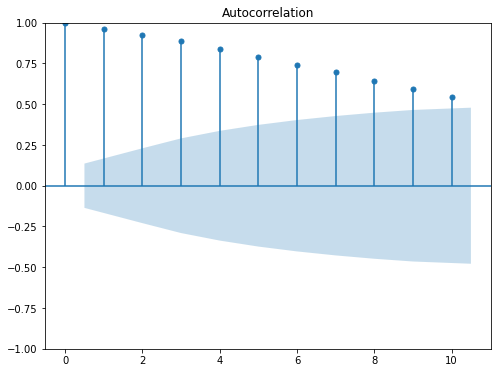

In [143]:
fig = plt.figure(figsize=(8,6))
fig.set_facecolor('white')
ax = fig.add_subplot()
sm.graphics.tsa.plot_acf(df['종가'], lags=10, ax=ax)
plt.show()


C:\Users\jangd\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


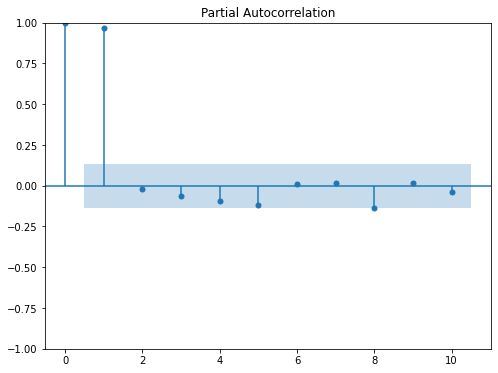

In [144]:
fig = plt.figure(figsize=(8,6))
fig.set_facecolor('white')
ax = fig.add_subplot()
sm.graphics.tsa.plot_pacf(df['종가'], lags=10, ax=ax)
plt.show()

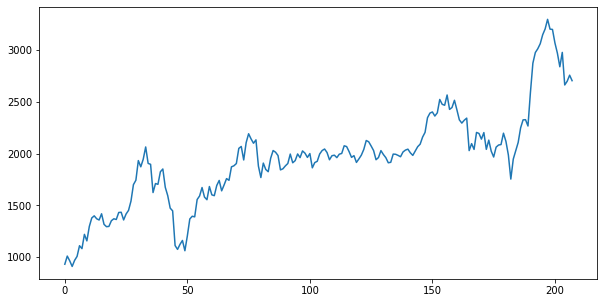

In [145]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(df['종가'])
plt.show()

In [146]:
df.drop(['Unnamed: 0','날짜','년도','월','date'],axis=1,inplace=True)
df

,종가,전월대비 등락률,외국인순매수
0,932.700012,0.041053,8538
1,1011.359985,0.084336,14654
2,965.679993,-0.045167,-20741
3,911.299988,-0.056313,-3243
4,970.210022,0.064644,1048
...,...,...,...
203,2977.649902,0.048834,15250
204,2663.340088,-0.105556,-389
205,2699.179932,0.013457,-6207
206,2757.649902,0.021662,-23373


In [147]:
# 1) DF 검정
from statsmodels.tsa.stattools import adfuller
result=adfuller(df['종가'])
result
# p-value = 0.1423 입니다. 이는 0.05보다 크므로 귀무가설을 기각하지 못합니다.
# 따라서 월 종가는 비정상성과정입니다.

(-1.8238795189182617,
 0.3686722670807975,
 0,
 207,
 {'1%': -3.4623415245233145,
  '5%': -2.875606128263243,
  '10%': -2.574267439846904},
 2302.9994454269327)

C:\Users\jangd\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


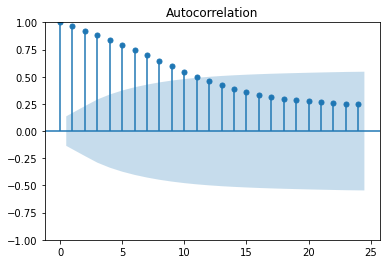

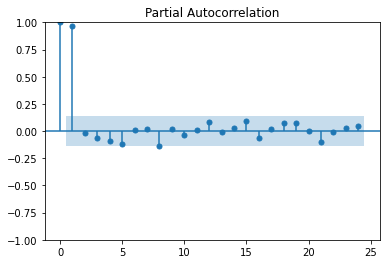

In [148]:
# 월 종가의 자기상관함수 & 편자기상관함수
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df['종가'])
plot_pacf(df['종가'])
plt.show()
# acf plot을 살펴보면 선형적으로 느리게 감소하므로 종가는 비정상시계열이라고 할 수 있다.
# 이를 차분을 통해 정상시계열로 전환하여야 한다.

               종가    전월대비 등락률      외국인순매수
count  207.000000  112.000000  128.000000
mean     0.005143   -0.083353    0.115580
std      0.052550    1.431533    1.398296
min     -0.263112   -3.832468   -3.249006
25%     -0.020506   -1.020421   -0.674962
50%      0.008654   -0.118414   -0.042726
75%      0.035221    0.729594    0.922621
max      0.133652    3.756785    5.123686


C:\Users\jangd\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\internals\blocks.py:402: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


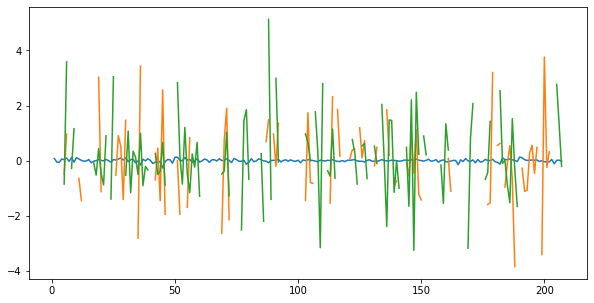

In [149]:
# 월 로그수익률
import numpy as np

datapct = df.pct_change()
log_data = np.log(1+datapct)
log_data.head()
print(log_data.describe())
plt.figure(figsize = (10,5))
plt.plot(log_data)
plt.show()
# 로그수익률의 plot을 그려봤을때 0을 중심으로 빠르게 움직이고 있음을 보이는 것을 확인하였습니다.

# 따라서 데이터에 로그를 씌운 로그수익률은 정상시계열일 가능성이 높습니다. 
# 이를 위에서 해주었던 Dickey-Fuller 검정을 이용하여 다시 한 번 확인해보겠습니다.

##### p-value

앞에서 p-값과는 다르다는 것을 확인할 수 있습니다. 이는 0.05보다 매우 작아 귀무가설을 기각합니다.

따라서 일일 로그수익률은 정상시계열임을 확인할 수 있습니다.



In [150]:
from statsmodels.tsa.stattools import adfuller
log_data = log_data.dropna()
result = adfuller(log_data['종가'])
result

(-4.367523129591763,
 0.0003386791920358814,
 12,
 65,
 {'1%': -3.5352168748293127,
  '5%': -2.9071540828402367,
  '10%': -2.5911025443786984},
 -209.63074068194118)


#### 로그수익률의 acf & pacf

C:\Users\jangd\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


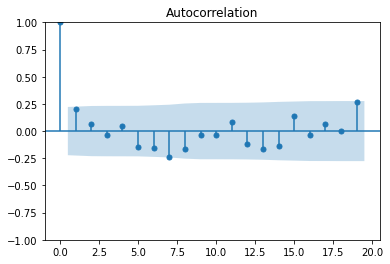

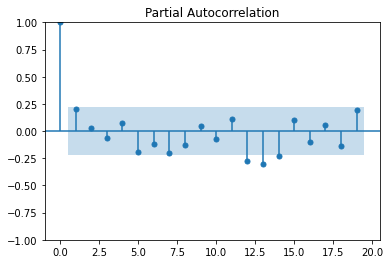

<class 'pandas.core.series.Series'>


In [151]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(log_data['종가'])
plot_pacf(log_data['종가'])
plt.show()
print(type(log_data['종가']))

##### 외국인순매수 acf,pacf

C:\Users\jangd\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


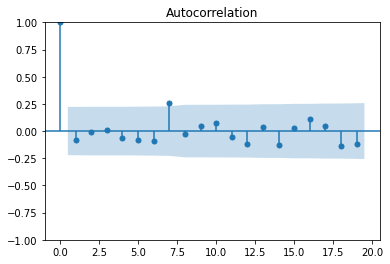

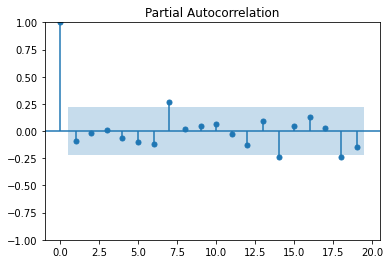

<class 'pandas.core.series.Series'>


In [152]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(log_data['외국인순매수'])
plot_pacf(log_data['외국인순매수'])
plt.show()
print(type(log_data['외국인순매수']))

In [153]:
log_data

,종가,전월대비 등락률,외국인순매수
1,0.080968,0.719948,0.540187
3,-0.057960,0.220555,-1.855614
5,0.038370,-0.502384,-0.845391
6,0.097395,0.961353,3.581047
14,-0.008780,-0.836287,0.003548
...,...,...,...
187,0.033573,-0.672596,1.523908
188,0.000739,-3.832468,-0.329394
194,0.015959,0.264810,0.588381
199,-0.000953,-3.402918,-0.361851


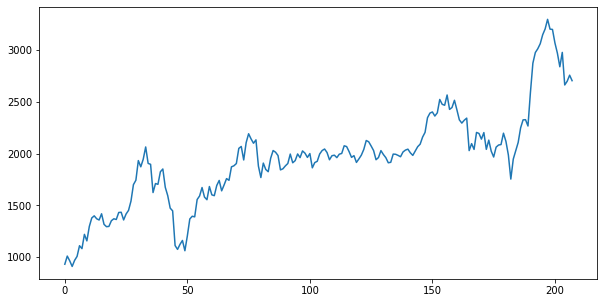

In [154]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(df['종가'])
plt.show()

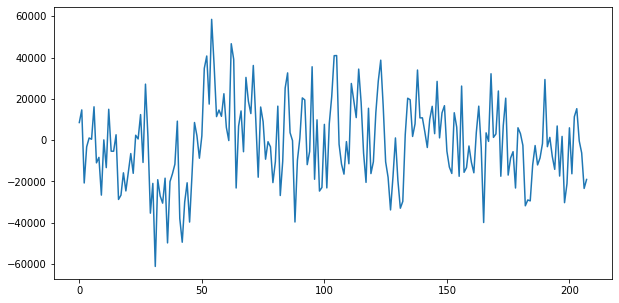

In [155]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(df['외국인순매수'])
plt.show()

In [156]:
log_data2 = log_data['종가'].values
log_data2=log_data2.reshape(1,-1)
print(log_data2.shape)
log_data2

(1, 78)


array([[ 0.08096761, -0.05796037,  0.03836957,  0.09739468, -0.00878011,
        -0.01726122,  0.04144627,  0.01370727,  0.09792752,  0.10326095,
         0.05903503, -0.00466458, -0.15503131, -0.04909858, -0.07852425,
        -0.01791783, -0.26311174, -0.03379757,  0.03292552,  0.12681879,
         0.01918875,  0.02194969,  0.04980526, -0.01600012,  0.02836781,
         0.03531114,  0.00539966,  0.0114481 ,  0.07403971,  0.00909068,
         0.03985592, -0.01969352, -0.06054848, -0.01185341,  0.03736471,
        -0.07245174,  0.01221527,  0.04670537, -0.02063148,  0.00642122,
         0.0359938 ,  0.01645411, -0.03552056,  0.00283438,  0.00362757,
         0.03624927, -0.02793989,  0.02743272,  0.04133782, -0.02146089,
        -0.04465891, -0.01551144, -0.02543142,  0.04048591, -0.00540535,
        -0.00660138,  0.00911426,  0.00440381,  0.02008363,  0.01157436,
         0.03226629,  0.02071232,  0.06237275,  0.01874229,  0.02803109,
        -0.04080468, -0.02526363,  0.00985407,  0.0

In [157]:
log_data3 = log_data['외국인순매수'].values
log_data3=log_data3.reshape(1,-1)
print(log_data3.shape)
log_data3

(1, 78)


array([[ 5.40186547e-01, -1.85561359e+00, -8.45391282e-01,
         3.58104675e+00,  3.54842094e-03, -7.58585466e-02,
         4.41150656e-01, -4.55926113e-01, -2.74916708e+00,
        -5.23757309e-01,  3.44753473e-01, -5.04877699e-01,
         9.94160491e-01,  2.63276971e-01, -4.99514856e-01,
        -3.73739327e-01,  6.53195722e-01, -8.81085551e-01,
        -1.40972461e+00,  2.83289719e+00,  1.58600431e-01,
        -4.73897250e-01, -1.16092990e+00, -2.34422676e-01,
        -1.76617941e-01,  7.26111280e-01, -4.79251723e-01,
        -3.79040167e-01,  1.03243733e+00, -1.27163975e+00,
        -5.82741484e-01, -2.50639399e+00, -6.75399801e-01,
        -9.58253599e-01,  2.55836191e-01,  5.12368650e+00,
         2.98508586e+00, -4.76959973e-02, -7.34031340e-02,
         9.73112304e-01,  6.61042660e-01,  1.48963995e-03,
         3.46515205e-01,  2.78953828e+00, -5.57614231e-01,
         1.14715121e+00,  1.18117750e+00,  7.68730727e-01,
         3.02239884e-01,  5.38068206e-01,  6.29959823e-0

In [158]:
inte = 24
X=[]
y=[]
for i in range(log_data2.shape[1]):
    if i + inte > log_data2.shape[1] - 1:
        break
    else:
         xx=log_data3[0, i : i + inte]
         X.append(xx)
         yy=log_data2[0, i + inte]
         y.append(yy)

In [159]:
X

[array([ 5.40186547e-01, -1.85561359e+00, -8.45391282e-01,  3.58104675e+00,
         3.54842094e-03, -7.58585466e-02,  4.41150656e-01, -4.55926113e-01,
        -2.74916708e+00, -5.23757309e-01,  3.44753473e-01, -5.04877699e-01,
         9.94160491e-01,  2.63276971e-01, -4.99514856e-01, -3.73739327e-01,
         6.53195722e-01, -8.81085551e-01, -1.40972461e+00,  2.83289719e+00,
         1.58600431e-01, -4.73897250e-01, -1.16092990e+00, -2.34422676e-01]),
 array([-1.85561359e+00, -8.45391282e-01,  3.58104675e+00,  3.54842094e-03,
        -7.58585466e-02,  4.41150656e-01, -4.55926113e-01, -2.74916708e+00,
        -5.23757309e-01,  3.44753473e-01, -5.04877699e-01,  9.94160491e-01,
         2.63276971e-01, -4.99514856e-01, -3.73739327e-01,  6.53195722e-01,
        -8.81085551e-01, -1.40972461e+00,  2.83289719e+00,  1.58600431e-01,
        -4.73897250e-01, -1.16092990e+00, -2.34422676e-01, -1.76617941e-01]),
 array([-8.45391282e-01,  3.58104675e+00,  3.54842094e-03, -7.58585466e-02,
        

In [160]:
y

[0.028367812246766735,
 0.035311144304577956,
 0.005399661953160758,
 0.0114480965378019,
 0.07403971253396804,
 0.009090675460452093,
 0.03985591920308886,
 -0.019693521086139643,
 -0.06054847726163564,
 -0.011853412878220108,
 0.037364714321908576,
 -0.07245173628480568,
 0.012215273693931241,
 0.04670536704982036,
 -0.020631477219442546,
 0.006421221997480142,
 0.03599380043404299,
 0.016454105582737587,
 -0.03552055608988969,
 0.0028343750828244067,
 0.003627570552211456,
 0.036249272559604105,
 -0.027939893709345315,
 0.02743271654476996,
 0.041337824322996486,
 -0.02146088911510502,
 -0.04465891002804165,
 -0.015511436894362487,
 -0.025431421671898692,
 0.040485906825158985,
 -0.005405350551124696,
 -0.006601376525845203,
 0.009114263191340073,
 0.004403814802843616,
 0.020083628570966607,
 0.011574358185930085,
 0.032266292560765096,
 0.020712320441968454,
 0.0623727537506667,
 0.018742293263998497,
 0.028031088288948857,
 -0.04080468087563087,
 -0.02526362768090057,
 0.00985406

In [161]:
print(type(X))
print(type(y))
X=np.asarray(X)
y=np.asarray(y)
print(X.shape)
print(y.shape)

<class 'list'>
<class 'list'>
(54, 24)
(54,)


In [162]:
# 시계열 순서를 유지하는 x_train, x_test, y_train, y_test를 정의
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=False)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(43, 24)
(11, 24)
(43,)
(11,)


In [168]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,GRU,LSTM
from tensorflow.keras import regularizers

model1=Sequential()
model1.add(Dense(1, input_shape=(24,)))
model1.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
model1.fit(X_train, y_train, epochs=30, batch_size=32)
loss_acc=model1.evaluate(X_train, y_train)
los_test=model1.evaluate(X_test, y_test)
y_pred = model1.predict(X_test)
print(loss_acc)
print(los_test)

Epoch 1/30
2/2 [==============================] - 0s 2ms/step - loss: 2.5442 - mae: 1.2947
Epoch 2/30
2/2 [==============================] - 0s 3ms/step - loss: 2.4619 - mae: 1.2744
Epoch 3/30
2/2 [==============================] - 0s 3ms/step - loss: 2.4183 - mae: 1.2608
Epoch 4/30
2/2 [==============================] - 0s 3ms/step - loss: 2.3743 - mae: 1.2478
Epoch 5/30
2/2 [==============================] - 0s 2ms/step - loss: 2.3428 - mae: 1.2396
Epoch 6/30
2/2 [==============================] - 0s 2ms/step - loss: 2.3088 - mae: 1.2294
Epoch 7/30
2/2 [==============================] - 0s 3ms/step - loss: 2.2745 - mae: 1.2206
Epoch 8/30
2/2 [==============================] - 0s 3ms/step - loss: 2.2502 - mae: 1.2140
Epoch 9/30
2/2 [==============================] - 0s 2ms/step - loss: 2.2215 - mae: 1.2053
Epoch 10/30
2/2 [==============================] - 0s 2ms/step - loss: 2.1940 - mae: 1.1965
Epoch 11/30
2/2 [==============================] - 0s 2ms/step - loss: 2.1615 - mae: 1.18

In [169]:
model1.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 1)                 25        
                                                                 
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________


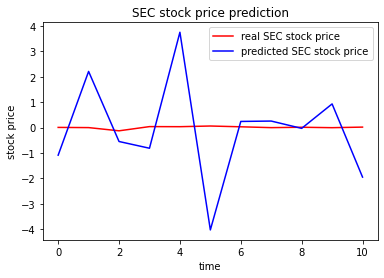

In [171]:
# Visualising the results
plt.figure()
plt.plot(y_test, color='red', label='real SEC stock price')
plt.plot(y_pred, color='blue', label='predicted SEC stock price')
plt.title('SEC stock price prediction')
plt.xlabel('time')
plt.ylabel('stock price')
plt.legend()
plt.show()

# df.close[-1] : dfy.close[-1] = x : pred_y[-1]

In [172]:
# MLP 모형에 은닉층 하나 추가
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,GRU,LSTM

model2=Sequential()
model2.add(Dense(32,activation='relu',input_shape=(24,)))
model2.add(Dense(1))                

model2.compile(optimizer='rmsprop', loss='mse',metrics=['mae'])
model2.fit(X_train, y_train, epochs=30, batch_size=32)
loss_acc=model2.evaluate(X_train, y_train)
los_test=model2.evaluate(X_test, y_test)
y_pred = model2.predict(X_test)
print(loss_acc)
print(los_test)

Epoch 1/30
2/2 [==============================] - 0s 2ms/step - loss: 1.8761 - mae: 1.1236
Epoch 2/30
2/2 [==============================] - 0s 2ms/step - loss: 1.5394 - mae: 1.0090
Epoch 3/30
2/2 [==============================] - 0s 2ms/step - loss: 1.3270 - mae: 0.9383
Epoch 4/30
2/2 [==============================] - 0s 3ms/step - loss: 1.1923 - mae: 0.8897
Epoch 5/30
2/2 [==============================] - 0s 2ms/step - loss: 1.0907 - mae: 0.8460
Epoch 6/30
2/2 [==============================] - 0s 2ms/step - loss: 1.0168 - mae: 0.8115
Epoch 7/30
2/2 [==============================] - 0s 3ms/step - loss: 0.9336 - mae: 0.7740
Epoch 8/30
2/2 [==============================] - 0s 3ms/step - loss: 0.8566 - mae: 0.7400
Epoch 9/30
2/2 [==============================] - 0s 2ms/step - loss: 0.7898 - mae: 0.7069
Epoch 10/30
2/2 [==============================] - 0s 2ms/step - loss: 0.7316 - mae: 0.6774
Epoch 11/30
2/2 [==============================] - 0s 2ms/step - loss: 0.6795 - mae: 0.65

In [173]:
model2.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 32)                800       
                                                                 
 dense_19 (Dense)            (None, 1)                 33        
                                                                 
Total params: 833
Trainable params: 833
Non-trainable params: 0
_________________________________________________________________


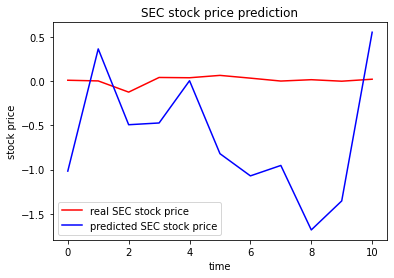

In [174]:
# Visualising the results
plt.figure()
plt.plot(y_test, color='red', label='real SEC stock price')
plt.plot(y_pred, color='blue', label='predicted SEC stock price')
plt.title('SEC stock price prediction')
plt.xlabel('time')
plt.ylabel('stock price')
plt.legend()
plt.show()

# df.close[-1] : dfy.close[-1] = x : pred_y[-1]

In [ ]:
# LSTM 모형 적용
X_train=X_train.reshape(-1,1,24)
X_test=X_test.reshape(-1,1,24)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,GRU,LSTM

model3 = Sequential()
model3.add(LSTM(32, input_shape=(1,24)))
model3.add(Dense(1))
model3.compile(optimizer='rmsprop', loss='mse',metrics=['mae'])
model3.fit(X_train, y_train, epochs=30, batch_size=32)
loss_acc = model3.evaluate(X_train, y_train)
los_test = model3.evaluate(X_test, y_test)
print(loss_acc)
print(los_test)

Epoch 1/30
2/2 [==============================] - 2s 3ms/step - loss: 0.0336 - mae: 0.1312
Epoch 2/30
2/2 [==============================] - 0s 3ms/step - loss: 0.0201 - mae: 0.0993
Epoch 3/30
2/2 [==============================] - 0s 3ms/step - loss: 0.0136 - mae: 0.0846
Epoch 4/30
2/2 [==============================] - 0s 3ms/step - loss: 0.0107 - mae: 0.0727
Epoch 5/30
2/2 [==============================] - 0s 3ms/step - loss: 0.0086 - mae: 0.0650
Epoch 6/30
2/2 [==============================] - 0s 2ms/step - loss: 0.0065 - mae: 0.0588
Epoch 7/30
2/2 [==============================] - 0s 3ms/step - loss: 0.0055 - mae: 0.0523
Epoch 8/30
2/2 [==============================] - 0s 3ms/step - loss: 0.0041 - mae: 0.0468
Epoch 9/30
2/2 [==============================] - 0s 3ms/step - loss: 0.0033 - mae: 0.0405
Epoch 10/30
2/2 [==============================] - 0s 3ms/step - loss: 0.0026 - mae: 0.0376
Epoch 11/30
2/2 [==============================] - 0s 2ms/step - loss: 0.0021 - mae: 0.03

In [ ]:
model3.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 32)                7296      
                                                                 
 dense_7 (Dense)             (None, 1)                 33        
                                                                 
Total params: 7,329
Trainable params: 7,329
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# GRU 모형 적용
model4 = Sequential()
model4.add(GRU(32, input_shape=(1,24)))
model4.add(Dense(1))
model4.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
model4.fit(X_train, y_train, epochs=30, batch_size=32)
loss_acc=model4.evaluate(X_train, y_train)
los_test=model4.evaluate(X_test, y_test)
print(loss_acc)
print(los_test)

Epoch 1/30
2/2 [==============================] - 2s 3ms/step - loss: 0.1939 - mae: 0.3397
Epoch 2/30
2/2 [==============================] - 0s 3ms/step - loss: 0.1325 - mae: 0.2792
Epoch 3/30
2/2 [==============================] - 0s 3ms/step - loss: 0.1048 - mae: 0.2453
Epoch 4/30
2/2 [==============================] - 0s 3ms/step - loss: 0.0849 - mae: 0.2223
Epoch 5/30
2/2 [==============================] - 0s 2ms/step - loss: 0.0700 - mae: 0.1983
Epoch 6/30
2/2 [==============================] - 0s 4ms/step - loss: 0.0588 - mae: 0.1814
Epoch 7/30
2/2 [==============================] - 0s 4ms/step - loss: 0.0478 - mae: 0.1653
Epoch 8/30
2/2 [==============================] - 0s 3ms/step - loss: 0.0409 - mae: 0.1515
Epoch 9/30
2/2 [==============================] - 0s 3ms/step - loss: 0.0335 - mae: 0.1392
Epoch 10/30
2/2 [==============================] - 0s 3ms/step - loss: 0.0269 - mae: 0.1271
Epoch 11/30
2/2 [==============================] - 0s 3ms/step - loss: 0.0227 - mae: 0.11

In [ ]:
model4.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 32)                5568      
                                                                 
 dense_8 (Dense)             (None, 1)                 33        
                                                                 
Total params: 5,601
Trainable params: 5,601
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# GRU 모형에 층 추가 적용
model5 = Sequential()
model5.add(GRU(32, input_shape=(1,24)))
model5.add(Dense(16))
model5.add(Dense(8))
model5.add(Dense(1))
model5.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
model5.fit(X_train, y_train, epochs=30, batch_size=32)
loss_acc = model5.evaluate(X_train, y_train)
los_test = model5.evaluate(X_test, y_test)
print(loss_acc)
print(los_test)

Epoch 1/30
2/2 [==============================] - 2s 3ms/step - loss: 0.1309 - mae: 0.2876
Epoch 2/30
2/2 [==============================] - 0s 3ms/step - loss: 0.0626 - mae: 0.1883
Epoch 3/30
2/2 [==============================] - 0s 3ms/step - loss: 0.0475 - mae: 0.1622
Epoch 4/30
2/2 [==============================] - 0s 4ms/step - loss: 0.0350 - mae: 0.1389
Epoch 5/30
2/2 [==============================] - 0s 3ms/step - loss: 0.0281 - mae: 0.1218
Epoch 6/30
2/2 [==============================] - 0s 3ms/step - loss: 0.0222 - mae: 0.1093
Epoch 7/30
2/2 [==============================] - 0s 3ms/step - loss: 0.0183 - mae: 0.1005
Epoch 8/30
2/2 [==============================] - 0s 4ms/step - loss: 0.0152 - mae: 0.0932
Epoch 9/30
2/2 [==============================] - 0s 3ms/step - loss: 0.0132 - mae: 0.0854
Epoch 10/30
2/2 [==============================] - 0s 3ms/step - loss: 0.0105 - mae: 0.0756
Epoch 11/30
2/2 [==============================] - 0s 3ms/step - loss: 0.0086 - mae: 0.06